## Daten aus API einlesen
Diesdasananas

Api Dokumentation gemäss: https://doc.iofrog.com/apidocumentation/api.html
Postman requests: https://www.getpostman.com/collections/eb80441a4500fd9a0634

In [1]:
# packages import
import requests
import json
import pandas as pd


Login to api

In [2]:
url = "https://www.iofrog.com/api/v2/auth/signin/"

payload = json.dumps({
  "username": "pascal.berger@students.fhnw.ch",
  "password": "123321"
})
headers = {
  'Content-Type': 'application/json',
  'Cookie': ''
}

login_response = requests.request("POST", url, headers=headers, data=payload)
#print(login_response.text)


In [3]:
login_data = pd.read_json(login_response.text)
access_token = login_data.loc['accessToken', 'token']
login_data

,user,token
firstName,Pascal,NaN
lastName,Berger,NaN
isActivated,True,NaN
level,expert,NaN
partner,heliot,NaN
lang,en,NaN
timeZone,Europe/Berlin,NaN
units,"{'temperature': 'C', 'system': 'M'}",NaN
accessToken,NaN,eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJpZCI6I...
refreshToken,NaN,607448e7914447151b7a7c5b.91ff3d83a1a2c3b9f3008...


get devices data

In [4]:
url = "https://www.iofrog.com/api/v2/devices/dashboard"

payload = json.dumps([
  {
    "data": [],
    "count": 2,
    "meta": {}
  }
])
headers = {
  'Authorization': 'Bearer ' + access_token,
  'Content-Type': 'application/json',
  'Cookie': ''
}

devices_response = requests.request("GET", url, headers=headers, data=payload)
#print(devices_response.text)


In [5]:
#print(devices_response.text)
#device_data = pd.read_json(devices_response.text)

device_dict = json.loads(devices_response.text)
device_data = pd.DataFrame.from_dict(device_dict['data'])
#device_data = pd.json_normalize(device_dict)
#device_dict['data']
device_data

,id,groupId,name,typeId,modeId,downlinkData,active,location,viewConfig,status,subscriptions,lastDataMessages,trackedKeys,badges,lastDataMessage,lastSourceBasedLocation
0,2203AF9,60476e95362d421c28ee0058,SimplePack POC_02203AF9 TeamA,simple_pack_plus_full_3_0_6_0,reed_counter,,True,"{'lat': None, 'lng': None}","{'locationSource': 'atlas', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '6050c0467d354e09ee4aa73e', 'provider...","[{'_id': '60742c3a914447151b7754c6', 'keys': [...",[],[],"{'_id': '60742c3a914447151b7754c6', 'keys': [{...",NaN
1,1F2504E,60476e95362d421c28ee0058,Türe Beschleunigung (PTH-04E),simple_pack_plus_full_3_0_6_0,put_me_back,,True,"{'lat': None, 'lng': None}","{'locationSource': 'atlas', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '6050bd897d354e09ee4a5d37', 'provider...","[{'_id': '60743afe3625b3466a8386f3', 'keys': [...",[],[],"{'_id': '60743afe3625b3466a8386f3', 'keys': [{...",NaN
2,2203AFA,60476e95362d421c28ee0058,Türe Magnet aussen (POC-AFA),simple_pack_plus_full_3_0_6_0,reed_counter,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '60489ad5362d421c28f49667', 'provider...","[{'_id': '6073e71c3625b3466a7a4643', 'keys': [...",[],[],"{'_id': '6073e71c3625b3466a7a4643', 'keys': [{...","{'geoplaces': [], '_id': '605b4291f4e46133dc9b..."
3,2203AAB,60476e95362d421c28ee0058,Türe Magnet innen (POC-AAB),simple_pack_plus_full_3_0_6_0,reed_counter,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '60489bab362d421c28f49a02', 'provider...","[{'_id': '6074452c3625b3466a84d19d', 'keys': [...",[],[],"{'_id': '6074452c3625b3466a84d19d', 'keys': [{...","{'geoplaces': [], '_id': '6059fbafb3ae30315afb..."
4,1F25047,60476e95362d421c28ee0058,Türriegel Beschl. (PTH-047),simple_pack_plus_full_3_0_6_0,put_me_back,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '60489b3f362d421c28f498b2', 'provider...","[{'_id': '6074456d3625b3466a84d816', 'keys': [...",[],[],"{'_id': '6074456d3625b3466a84d816', 'keys': [{...","{'geoplaces': [], '_id': '6058b9d703380b4c4fd1..."
5,2203ACB,60476e95362d421c28ee0058,Türriegel Magnet (POC-ACB),simple_pack_plus_full_3_0_6_0,reed_counter,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '60489995362d421c28f48edd', 'provider...","[{'_id': '607444163625b3466a84b009', 'keys': [...",[],[],"{'_id': '607444163625b3466a84b009', 'keys': [{...","{'geoplaces': [], '_id': '605b68f2f4e46133dc9e..."


In [6]:
url = "https://www.iofrog.com/api/v2/devices/2203AAB/messages/"

payload = json.dumps({
  "data": [
    {
      "_id": "1f704bc5-5055-43eb-a851-c87b6b0bf7b9",
      "isAlarm": False,
      "isDismissed": False,
      "timestamp": 1584093653,
      "type": "data_uplink",
      "seqNumber": 1,
      "keys": [
        {
          "isCode": False,
          "_id": "1111111111111111111111",
          "key": "key",
          "value": "value",
          "keyLocale": "Klíč",
          "valueLocale": "Hodnota",
          "color": "alarm",
          "icon": "icon name (from fontAwesome)"
        }
      ]
    }
  ],
  "count": 1
})
headers = {
  'Authorization': 'Bearer ' + access_token,
  'Content-Type': 'application/json',
  'Cookie': ''
}

message_response = requests.request("GET", url, headers=headers, data=payload)

# print(response.text)


In [7]:
# data prep


message_dict = json.loads(message_response.text)
#print(message_dict['data'])
message_data = pd.DataFrame.from_dict(message_dict['data'])

message_data = message_data.drop(columns=['keys'])

message_data_keys = pd.json_normalize(message_dict['data'], record_path='keys', record_prefix='keys_', meta='_id')
message_data_keys = message_data_keys.pivot(index=['_id'], columns='keys_key', values='keys_value')
message_data_keys.reset_index(inplace=True)
message_data_keys = message_data_keys.groupby('_id').sum()
#print(message_data_keys)
# join df's
message_data = message_data.merge(message_data_keys, on=['_id'], how='left', indicator=True)

message_data



,_id,timestamp,type,seqNumber,deviceId,created,__v,action,battery,counter,mode,temperature,_merge
0,6074452c3625b3466a84d19d,1618232619,data_bidir,599.0,2203AAB,2021-04-12T13:03:40.387Z,0,reed_counter,0,729,reed_counter,0,both
1,607443f73625b3466a84acc1,1618232310,data_bidir,598.0,2203AAB,2021-04-12T12:58:31.441Z,0,reed_counter,0,728,reed_counter,0,both
2,6074401c914447151b797685,1618231322,data_bidir,597.0,2203AAB,2021-04-12T12:42:04.667Z,0,reed_counter,0,727,reed_counter,0,both
3,60743f61914447151b795db1,1618231136,data_bidir,596.0,2203AAB,2021-04-12T12:38:57.276Z,0,reed_counter,0,726,reed_counter,0,both
4,60743acb914447151b78cab0,1618229962,data_bidir,595.0,2203AAB,2021-04-12T12:19:23.251Z,0,reed_counter,0,725,reed_counter,0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6070856a6d938d118a00cd94,1617986921,data_bidir,504.0,2203AAB,2021-04-09T16:48:42.497Z,0,reed_counter,0,640,reed_counter,0,both
96,60707b9e6d938d118aff7bd8,1617984414,data_bidir,503.0,2203AAB,2021-04-09T16:06:54.873Z,0,reed_counter,0,639,reed_counter,0,both
97,60707b616d938d118aff6c15,1617984352,data_bidir,502.0,2203AAB,2021-04-09T16:05:53.712Z,0,reed_counter,0,637,reed_counter,0,both
98,60707b246d938d118aff63a7,1617984292,data_bidir,501.0,2203AAB,2021-04-09T16:04:52.857Z,0,reed_counter,0,636,reed_counter,0,both


C:\Users\Pascal\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\core.py:613: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001DD1AEEDD00> has a label of '__v' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


<AxesSubplot:>

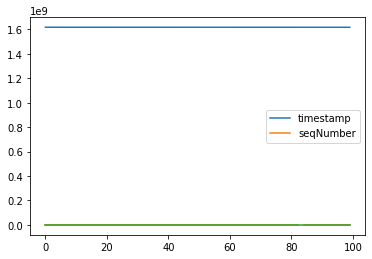

In [8]:
message_data.plot()

drive api (testing still)

In [9]:
# pip install pydrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

ModuleNotFoundError: No module named 'pydrive'

In [11]:
# Rename the downloaded JSON file to client_secrets.json
# The client_secrets.json file needs to be in the same directory as the script.
gauth = GoogleAuth()
drive = GoogleDrive(gauth)
# List files in Google Drive
fileList = drive.ListFile({'q': "'1pxYux33QnFcvrpP17Q88_xY1nW79aJL-' in parents and trashed=false"}).GetList()
# for file1 in fileList:
#   print('title: %s, id: %s' % (file1['title'], file1['id']))

  

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?client_id=491460359726-lj3ilu22ir8ckqnjefot5gs99vmig1d2.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&access_type=offline&response_type=code



In [51]:
fileCons = list()

for file1 in fileList:
  if 'downloadUrl' in file1:
    fileCons.append(requests.get(file1['downloadUrl']).content)
  else:
    print('unsupported file')

unsupported file


In [53]:
print(fileCons)

[b'{\n "error": {\n  "errors": [\n   {\n    "domain": "usageLimits",\n    "reason": "dailyLimitExceededUnreg",\n    "message": "Daily Limit for Unauthenticated Use Exceeded. Continued use requires signup.",\n    "extendedHelp": "https://code.google.com/apis/console"\n   }\n  ],\n  "code": 403,\n  "message": "Daily Limit for Unauthenticated Use Exceeded. Continued use requires signup."\n }\n}\n']
